# Scatter Plot Visuals to study how diverse factors influence the risk of CVD Incidence 

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Analyse all factors (besides) relative to one another and 
# glucose levels (3 unique values)
# cholesterol levels (3 unique values) (3x3 permutations)
# smoker (2 unique values)
# alcohol (2 unique values)
# active (2 unique values) (2x2x2 permutations)
# There is a total of 72(9x8) different permutations to be plotted against age.
# Permutations have been performed on MySQL to yield 2 new columns; 
# gluc_and_chol (glucose levels vs cholesterol levels),
# lifestyle_habits (smoker vs alcohol vs active).
# plot each permutation against age with each point representing a participant using 3D scatter plot and subplots.

# load the dataset
df = pd.read_csv (r'C:\Users\User\OneDrive\Documents\Cardiohealth\multivariateCVDTable.csv')

In [158]:
print(df.head())

   case_id  age_in_years     sex  body_mass_index  cholesterol_ranking  \
0        0         50.36    male            21.97                    1   
1        1         55.38  female            34.93                    3   
2        2         51.63  female            23.51                    3   
3        3         48.25    male            28.71                    1   
4        4         47.84  female            23.01                    1   

   glucose_ranking  gluc_and_chol  smoker  alcohol  active  lifestyle_habits  \
0                1              1       0        0       1                 2   
1                1              7       0        0       1                 2   
2                1              7       0        0       0                 1   
3                1              1       0        0       1                 2   
4                1              1       0        0       0                 1   

   cardio_condition  
0                 0  
1                 1  
2       

In [159]:
# Convert cardio_condition to boolean
df['cardio_condition'] = df['cardio_condition'].apply(lambda x: True if x == 1 else False)

# Convert smoker to boolean
df['smoker'] = df['smoker'].apply(lambda x: True if x == 1 else False)

# Convert alcohol to boolean
df['alcohol'] = df['alcohol'].apply(lambda x: True if x == 1 else False)

# Convert active to boolean
df['active'] = df['active'].apply(lambda x: True if x == 1 else False)

# Rename the columns 'glucose_ranking' and 'cholesterol_ranking' to 'glucose_levels' and 'cholesterol_levels'
df = df.rename(columns={'glucose_ranking': 'glucose_levels'})
df = df.rename(columns={'cholesterol_ranking': 'cholesterol_levels'})

                                                                
# Convert glucose_levels to text (standard categories)
# Define the mapping
mapping = {
    1: 'normal',
    2: 'above normal',
    3: 'well above normal'   
}

# Apply the mapping
df['glucose_levels'] = df['glucose_levels'].map(mapping)

# Convert cholesterol_levels to text (standard categories)
# Define the mapping
mapping = {
    1: 'normal',
    2: 'above normal',
    3: 'well above normal'   
}

# Apply the mapping
df['cholesterol_levels'] = df['cholesterol_levels'].map(mapping)

df_sorted_asc = df.sort_values('age_in_years')

In [160]:
# Calculate the min age
min_age = df['age_in_years'].min()

# Calculate the max age
max_age = df['age_in_years'].max()

# Calculate the mean age
mean_age = df['age_in_years'].mean()

# Calculate the median age
median_age = df['age_in_years'].median()

print(f"Min Age: {min_age}")
print(f"Mean Age: {mean_age}")
print(f"Max Age: {max_age}")
print(f"Median Age: {median_age}")


Min Age: 29.56
Mean Age: 53.30250435950945
Max Age: 64.92
Median Age: 53.94


In [161]:
print(df.head())

   case_id  age_in_years     sex  body_mass_index cholesterol_levels  \
0        0         50.36    male            21.97             normal   
1        1         55.38  female            34.93  well above normal   
2        2         51.63  female            23.51  well above normal   
3        3         48.25    male            28.71             normal   
4        4         47.84  female            23.01             normal   

  glucose_levels  gluc_and_chol  smoker  alcohol  active  lifestyle_habits  \
0         normal              1   False    False    True                 2   
1         normal              7   False    False    True                 2   
2         normal              7   False    False   False                 1   
3         normal              1   False    False    True                 2   
4         normal              1   False    False   False                 1   

   cardio_condition  
0             False  
1              True  
2              True  
3         

In [162]:
print(df['body_mass_index'].max())

60.0


In [163]:
# the scatter plots are sliced in power BI using the gluc_and_chol permutations as carried out on MySQL
# gluc_and_chol =
# 1 : where cholesterol_ranking = 1 and glucose_ranking = 1
# 2 : where cholesterol_ranking = 1 and glucose_ranking = 2
# 3 : where cholesterol_ranking = 1 and glucose_ranking = 3
# 4 : where cholesterol_ranking = 2 and glucose_ranking = 1
# 5 : where cholesterol_ranking = 2 and glucose_ranking = 2
# 6 : where cholesterol_ranking = 2 and glucose_ranking = 3
# 7 : where cholesterol_ranking = 3 and glucose_ranking = 1
# 8 : where cholesterol_ranking = 3 and glucose_ranking = 2
# 9 : where cholesterol_ranking = 3 and glucose_ranking = 3

# Use clearer descriptions in Power BI

#glucose level/cholesterol level

mapping = {
    1: 'normal Glucose/normal Cholesterol', 
    2: 'normal Glucose/above normal Cholesterol',
    3: 'normal Glucose/well above normal Cholesterol',
    4: 'above normal Glucose/normal Cholesterol',
    5: 'above normal Glucose/above normal Cholesterol',
    6: 'above normal Glucose/well above normal Cholesterol',
    7: 'well above normal Glucose/normal Cholesterol', 
    8: 'well above normal Glucose/above normal Cholesterol',
    9: 'well above normal Glucose/well above normal Cholesterol'
}
# Apply the mapping
df['gluc_and_chol'] = df['gluc_and_chol'].map(mapping)

In [164]:
#export data for Power BI visualisation
df.to_csv (r'C:\Users\User\OneDrive\Documents\Cardiohealth\updated_cardio_health_multi2.csv')

In [165]:
import altair as alt

# Calculate age frequencies by sex
age_counts = df.groupby(['sex', 'age_in_years']).size().reset_index(name='agefrequency')

# Create a histogram using Altair
chart = alt.Chart(age_counts).mark_bar().encode(
    x=alt.X('age_in_years', bin=True, title='Age'),
    y=alt.Y('agefrequency', title='Frequency'),
    color='sex',
    tooltip=['age_in_years', 'agefrequency', 'sex']
).properties(
    title='Age Distribution Histogram by Sex'
).interactive()

# Save the chart
chart.save('distribution_of_age_by_sex.json')

# Display the chart
chart.show() 

alt.Chart(...)

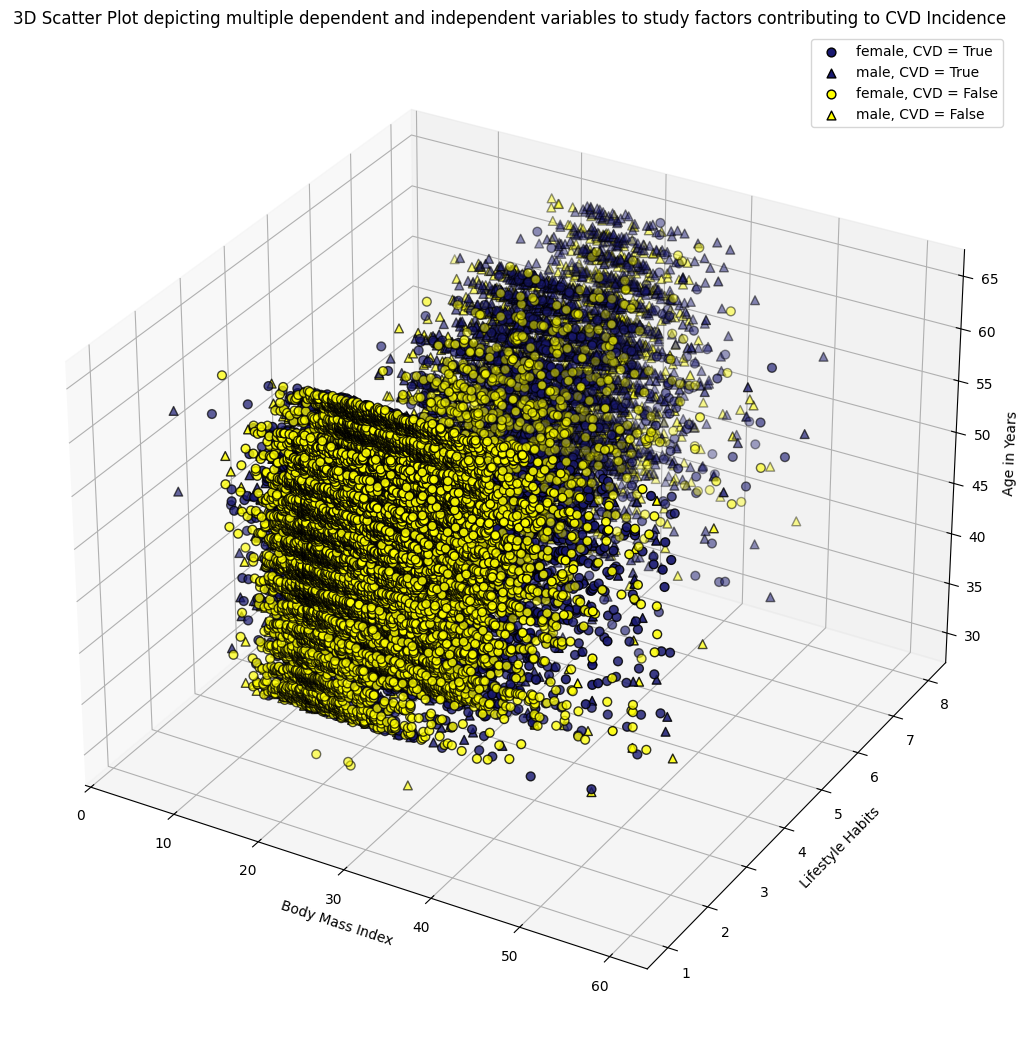

In [166]:
#Creates a 3D scatter plot with different colors for True or False values in cardio_condition
# and different shapes for males and females .

# Axes definitions for 3D scatter plot 
x = df['body_mass_index']
y = df['lifestyle_habits']
z = df['age_in_years']
sex = df['sex']
cvd = df['cardio_condition']

# Create the figure
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
fig.add_axes(ax)

# Define colors for the presence or absence of CVD
colors = {True: 'midnightblue', False: 'yellow'}

# Define markers for male and female
markers = {'female': 'o', 'male': '^'}

# Create the scatter plot with colors and markers
for s in colors:
    for c in markers:
        subset = df[(df['cardio_condition'] == s) & (df['sex'] == c)]
        ax.scatter(subset['body_mass_index'], 
                    subset['lifestyle_habits'], 
                    subset['age_in_years'], s=40,
                    c=colors[s], edgecolors='black',
                    marker=markers[c], 
                    label=f"{c}, CVD = {s}")

# Set labels and title
ax.set_xlabel('Body Mass Index')
ax.set_ylabel('Lifestyle Habits')
ax.set_zlabel('Age in Years')
ax.set_title('3D Scatter Plot depicting multiple dependent and independent variables to study factors contributing to CVD Incidence')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [167]:
# Convert lifestyle_habits to text (based on categories established in MySQL)
# 1 : where smoker is False and alcohol is False and Active is False
# 2 : where smoker is False and alcohol is False and Active is True
# 3 : where smoker is False and alcohol is True and Active is False
# 4 : where smoker is False and alcohol is True and Active is True
# 5 : where smoker is True and alcohol is False and Active is False
# 6 : where smoker is True and alcohol is False and Active is True
# 7 : where smoker is True and alcohol is True and Active is False
# 8 : where smoker is True and alcohol is True and Active is True


# Define the mapping
mapping = {
    1: 'non-smoker, non-drinker and inactive',
    2: 'non-smoker, non-drinker and active',
    3: 'non-smoker, alcohol consumer and inactive',
    4: 'non-smoker, alcohol consumer and active',
    5: 'smoker, non-drinker and inactive',
    6: 'smoker, non-drinker and active',
    7: 'smoker, alcohol consumer and inactive',
    8: 'smoker, alcohol consumer and active',
}

# Apply the mapping
df['lifestyle_habits'] = df['lifestyle_habits'].map(mapping)


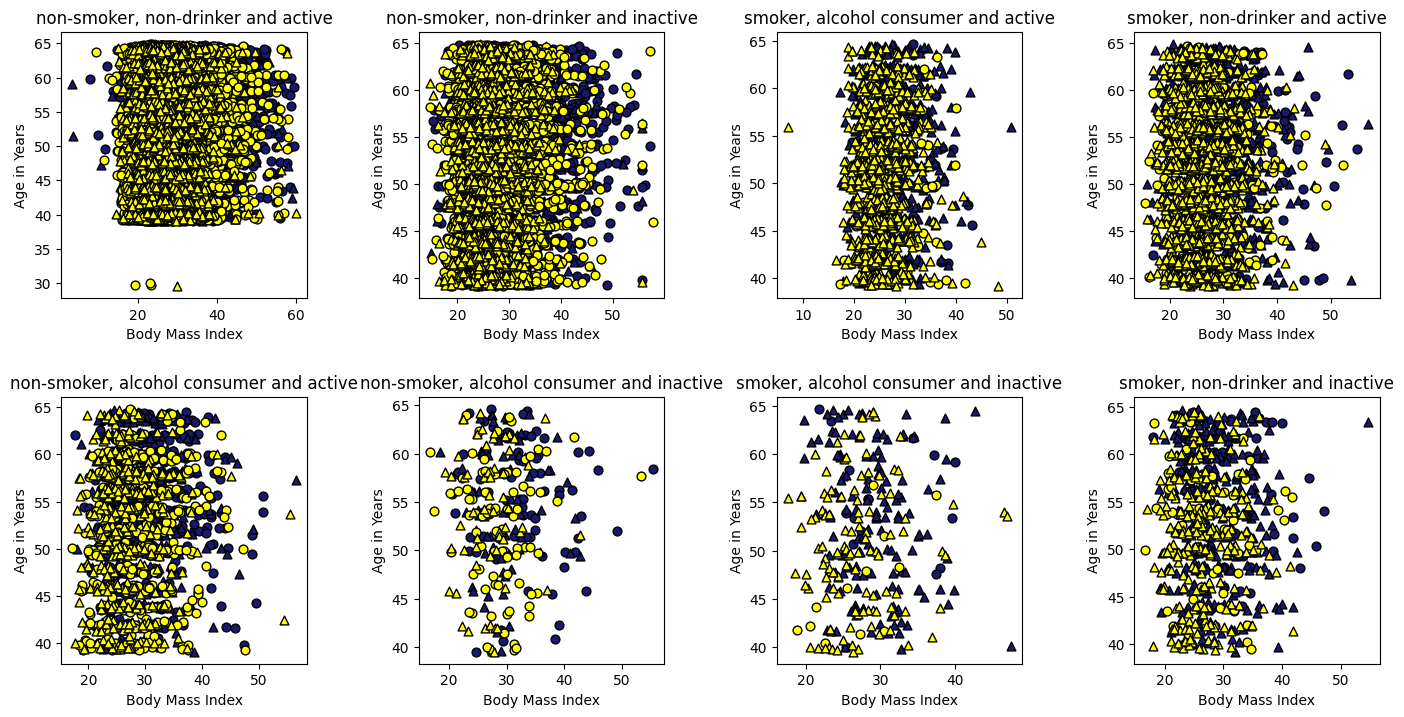

In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Axes definitions
x = df['body_mass_index']
y = df['lifestyle_habits']  # Keep this for filtering
z = df['age_in_years']
cvd = df['cardio_condition']

# Define colors for the presence or absence of CVD
colors = {True: 'midnightblue', False: 'yellow'}

# Define markers for male and female
markers = {'female': 'o', 'male': '^'}

# Get unique lifestyle habits
unique_habits = df['lifestyle_habits'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.tight_layout(pad=5.0)

for i, habit in enumerate(unique_habits):
    row = i // 4  # Calculate row index
    col = i % 4  # Calculate column index
    ax = axes[row, col]

    # Filter data for the current habit
    subset = df[df['lifestyle_habits'] == habit]

    # Create the scatter plot for the current habit
    for s in colors:
        for c in markers:
            data = subset[(subset['cardio_condition'] == s) & (subset['sex'] == c)]
            ax.scatter(data['body_mass_index'], 
                       data['age_in_years'], 
                       s=40, 
                       c=colors[s], 
                       edgecolors='black', 
                       marker=markers[c], 
                       label=f"{c}, CVD = {s}")

    ax.set_xlabel('Body Mass Index')
    ax.set_ylabel('Age in Years')
    ax.set_title(f"{habit}")

plt.show()

# Same legend from the 3D scatterplot applies. 